 Capstone 3
 Fahrizal Denta Saputra (A11.2022.14059)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet (1).csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ObesityDataSet.csv')

In [6]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


### EDA = Mengecek Struktur Data & Missing Values


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [8]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [9]:
print("\nMissing Values per Kolom:")
print(df.isnull().sum())


Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [10]:
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [11]:
print("\nJumlah Duplikat:")
print(df.duplicated().sum())


Jumlah Duplikat:
18


In [12]:
# Cek distribusi kategori target
print("Distribusi Label Target:")
print(df['NObeyesdad'].value_counts())

Distribusi Label Target:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


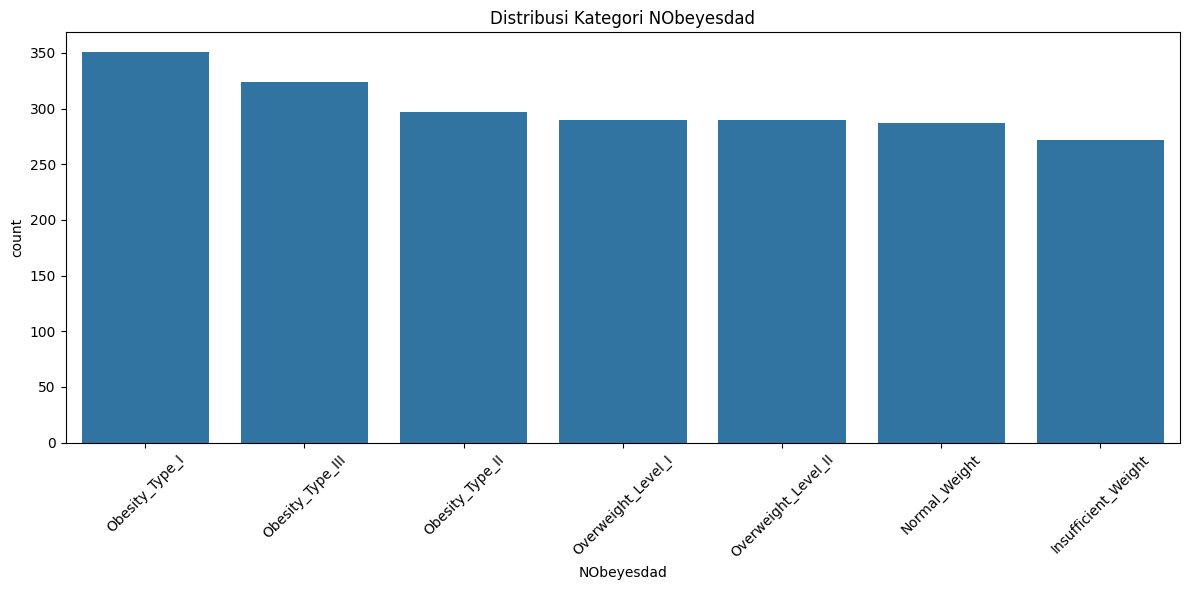

In [13]:
# Visualisasi distribusi target (label obesitas)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kategori NObeyesdad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

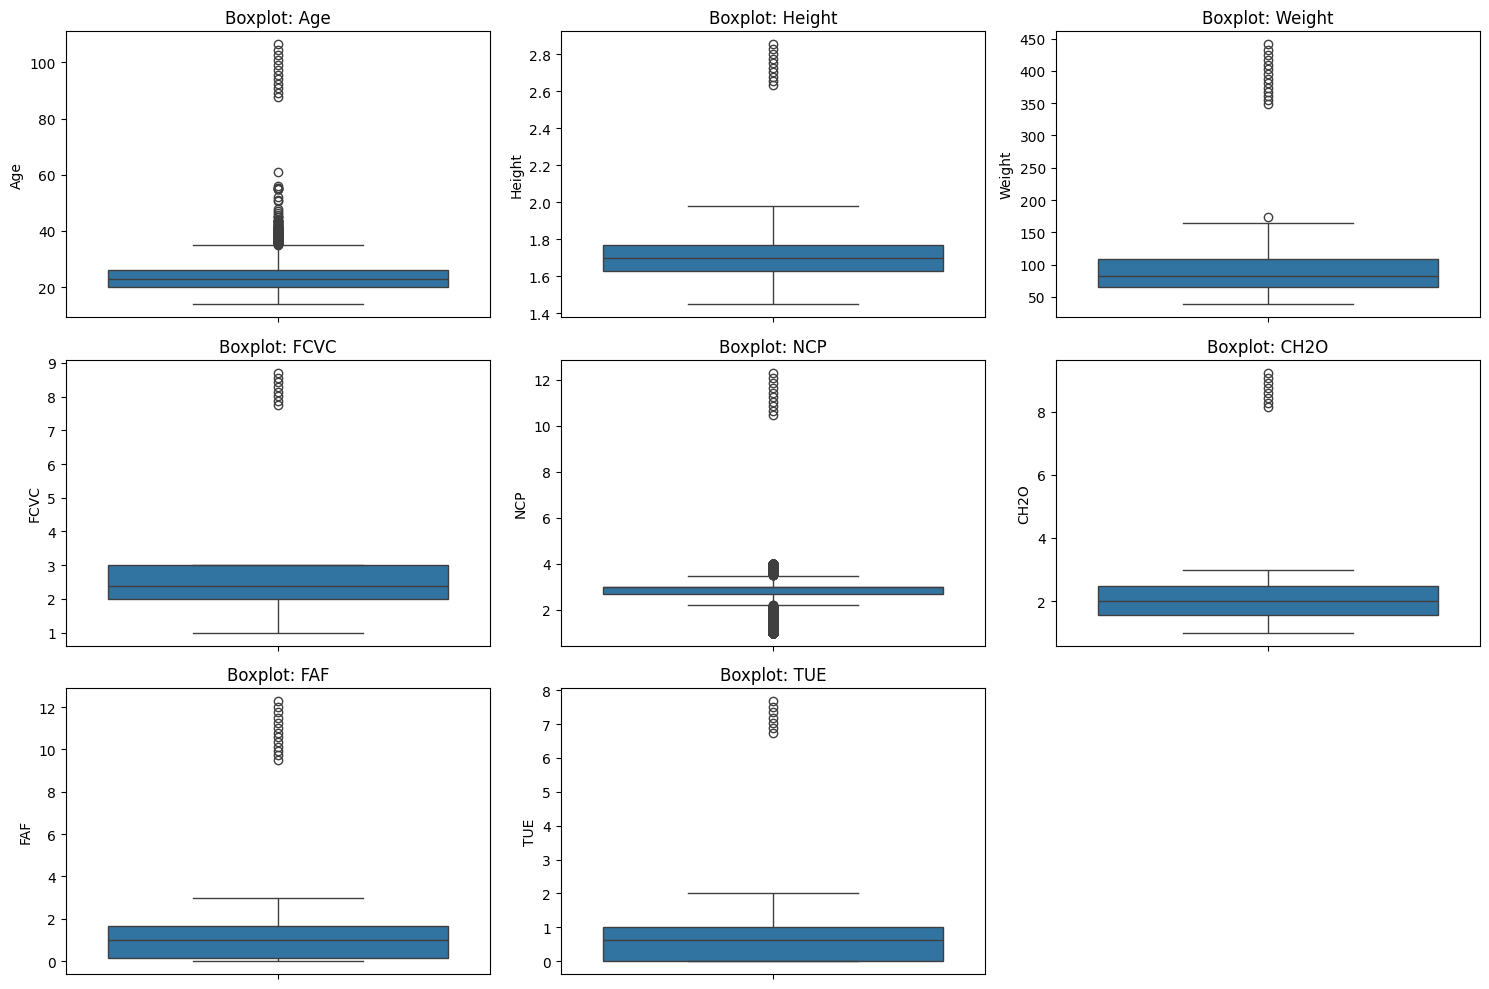

In [14]:
# Konversi kolom numerik dari object ke float
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tampilkan boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

##Kesimpulan Capstone 1


*   Dataset memiliki 2111 baris dan 17 kolom.
*   Banyak kolom numerik masih bertipe object dan sudah dikonversi.
*   Terdapat missing values pada tiap kolom yang perlu ditangani.
*   Ada 18 data duplikat yang dapat dihapus.
*   Distribusi data target tidak seimbang, sehingga perlu penanganan lebih lanjut saat modeling.
*   Hampir semua kolom numerik mengandung outlier, terutama pada kolom Weight, Age, dan NCP.


## Preprocesing

In [15]:
# Tangani missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-15-ffb383bb8d88>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-15-ffb383bb8d88>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [16]:
# Mengecek kembali missing values
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [27]:
# Hapus outlier dengan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in num_cols :
    df = remove_outliers_iqr(df, col)

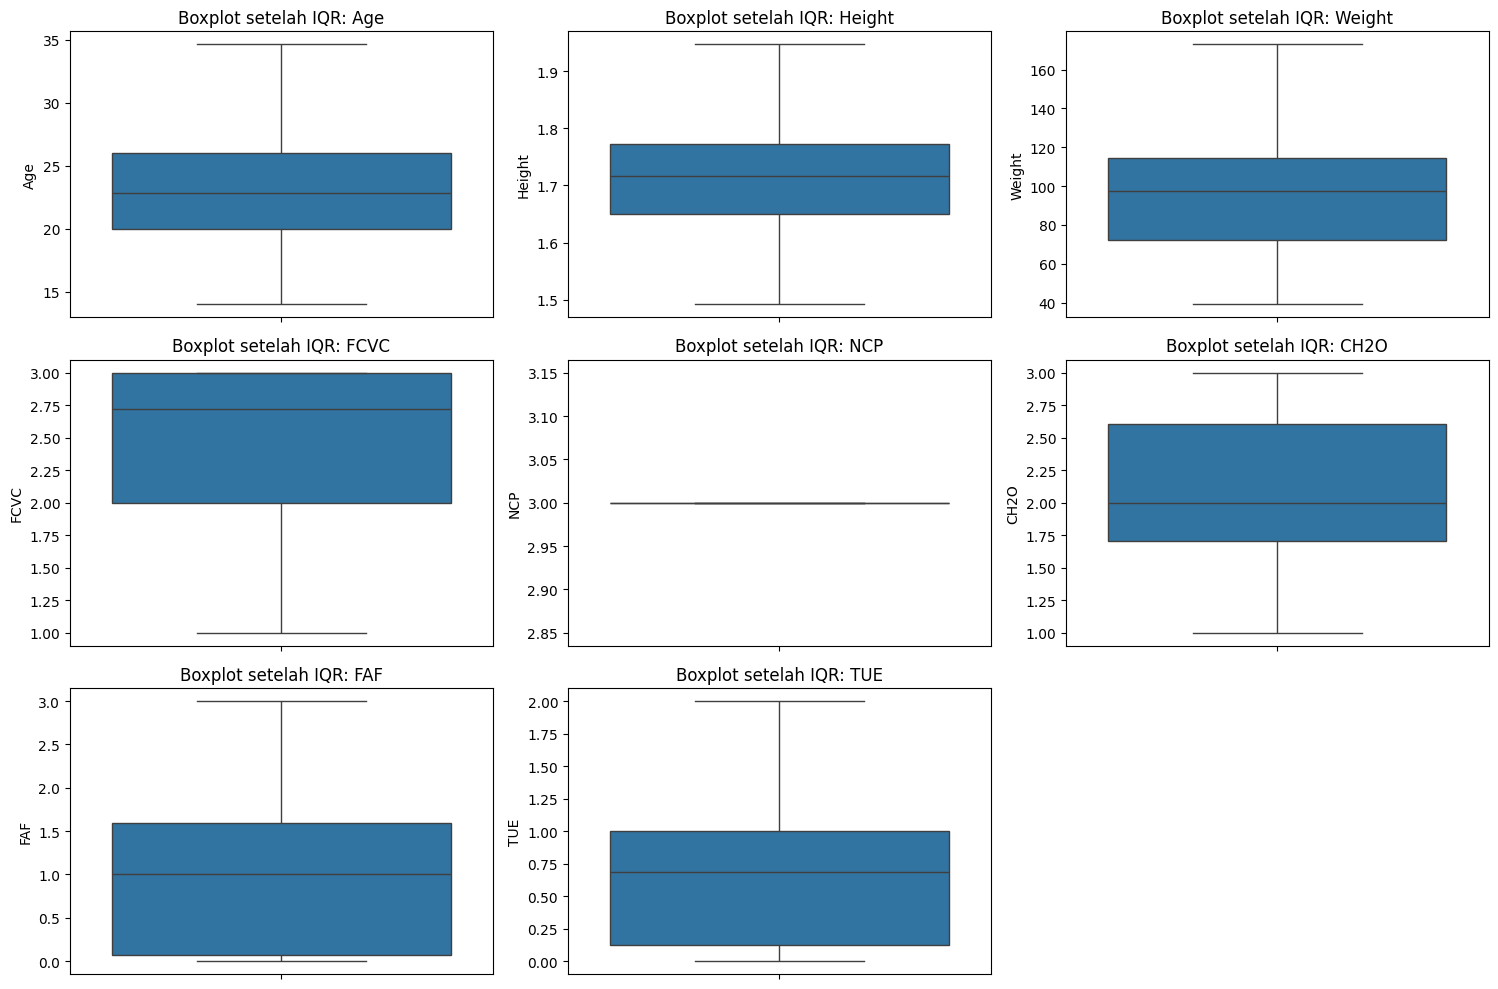

In [28]:
# Menampilkan boxplot setelah outlier dihapus
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot setelah IQR: {col}')
plt.tight_layout()
plt.show()

In [31]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

In [33]:
# Encoding data kategorikal
le_dict = {}
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# categorical_cols.remove('NObeyesdad')  # target terpisah

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

In [34]:
# Seleksi fitur (korelasi dengan target)
correlation = df.corr()['NObeyesdad'].sort_values(ascending=False)
print("Korelasi fitur dengan target:\n", correlation)


Korelasi fitur dengan target:
 NObeyesdad                        1.000000
Weight                            0.469453
family_history_with_overweight    0.344876
CAEC                              0.261394
Age                               0.249104
FCVC                              0.172541
FAVC                              0.127897
CH2O                              0.127737
MTRANS                            0.030965
Height                           -0.000424
SMOKE                            -0.033954
TUE                              -0.064754
Gender                           -0.126194
SCC                              -0.136471
FAF                              -0.171339
CALC                             -0.209581
NCP                                    NaN
Name: NObeyesdad, dtype: float64


In [35]:
# Menangani ketidakseimbangan kelas dengan SMOTE
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

print("Distribusi sebelum SMOTE:\n", y.value_counts())

# SMOTE untuk oversampling
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("\nDistribusi sesudah SMOTE:\n", pd.Series(y_resampled).value_counts())


Distribusi sebelum SMOTE:
 NObeyesdad
4    314
1    188
3    163
2    149
5     95
6     90
0     89
Name: count, dtype: int64

Distribusi sesudah SMOTE:
 NObeyesdad
1    314
5    314
2    314
6    314
3    314
0    314
4    314
Name: count, dtype: int64


In [36]:
# Normalisasi (Standard Scaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1088 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1088 non-null   float64
 1   Gender                          1088 non-null   int64  
 2   Height                          1088 non-null   float64
 3   Weight                          1088 non-null   float64
 4   CALC                            1088 non-null   int64  
 5   FAVC                            1088 non-null   int64  
 6   FCVC                            1088 non-null   float64
 7   NCP                             1088 non-null   float64
 8   SCC                             1088 non-null   int64  
 9   SMOKE                           1088 non-null   int64  
 10  CH2O                            1088 non-null   float64
 11  family_history_with_overweight  1088 non-null   int64  
 12  FAF                             1088 no

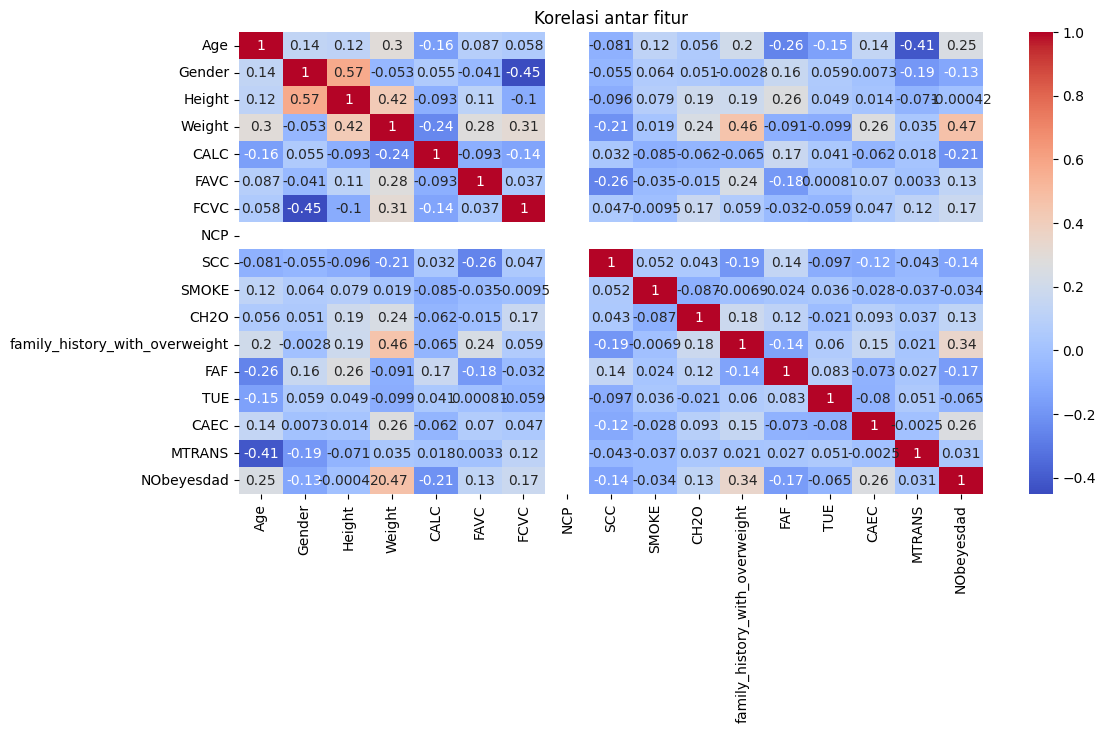

In [38]:
# Heatmap korelasi untuk melihat keterkaitan antar fitur
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()


##Kesimpulan Capstone 2


*   Dataset memiliki 1348 baris setelah preprocessing dan penghapusan outlier.
*   Tidak ada missing values di semua kolom.
*   Tipe data sudah sesuai (int64 dan float64).
*   Outlier sebagian besar telah dihapus dengan metode IQR.
*   Fitur kategorikal telah di-encode ke bentuk numerik.


## Modeling


In [42]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model
logreg = LogisticRegression(random_state=42, max_iter=1000)  # Tambahan max_iter untuk menghindari warning
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Training model
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Simpan model dalam dictionary
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'KNN': knn
}

# Untuk menyimpan hasil evaluasi
results = {}

# Evaluasi model
for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n🔍 Hasil Evaluasi Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    }



🔍 Hasil Evaluasi Model: Logistic Regression
Confusion Matrix:
 [[15  7  1  0  0  0  0]
 [ 0 34  0  0  0  1  1]
 [ 0  0 20  3  0  0  1]
 [ 0  0  0 26  2  0  1]
 [ 0  0  0  0 60  1  0]
 [ 0  7  1  0  0 15  0]
 [ 0  3  3  1  0  7  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        23
           1       0.67      0.94      0.78        36
           2       0.80      0.83      0.82        24
           3       0.87      0.90      0.88        29
           4       0.97      0.98      0.98        61
           5       0.62      0.65      0.64        23
           6       0.73      0.36      0.48        22

    accuracy                           0.82       218
   macro avg       0.81      0.76      0.77       218
weighted avg       0.83      0.82      0.81       218


🔍 Hasil Evaluasi Model: Random Forest
Confusion Matrix:
 [[18  5  0  0  0  0  0]
 [ 0 34  1  0  0  1  0]
 [ 0  0 23  0  0  0  1]
 [ 0  0  0 28  0

In [48]:
# Menampilkan hasil evaluasi dalam bentuk dictionary
print("\n📊 Ringkasan Hasil Evaluasi:")
for model_name, metrics in results.items():
    print(f"\n{model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


📊 Ringkasan Hasil Evaluasi:

Logistic Regression
Accuracy: 0.8165
Precision: 0.8291
Recall: 0.8165
F1-score: 0.8087

Random Forest
Accuracy: 0.9220
Precision: 0.9316
Recall: 0.9220
F1-score: 0.9228

KNN
Accuracy: 0.8303
Precision: 0.8322
Recall: 0.8303
F1-score: 0.8296


<Figure size 1000x600 with 0 Axes>

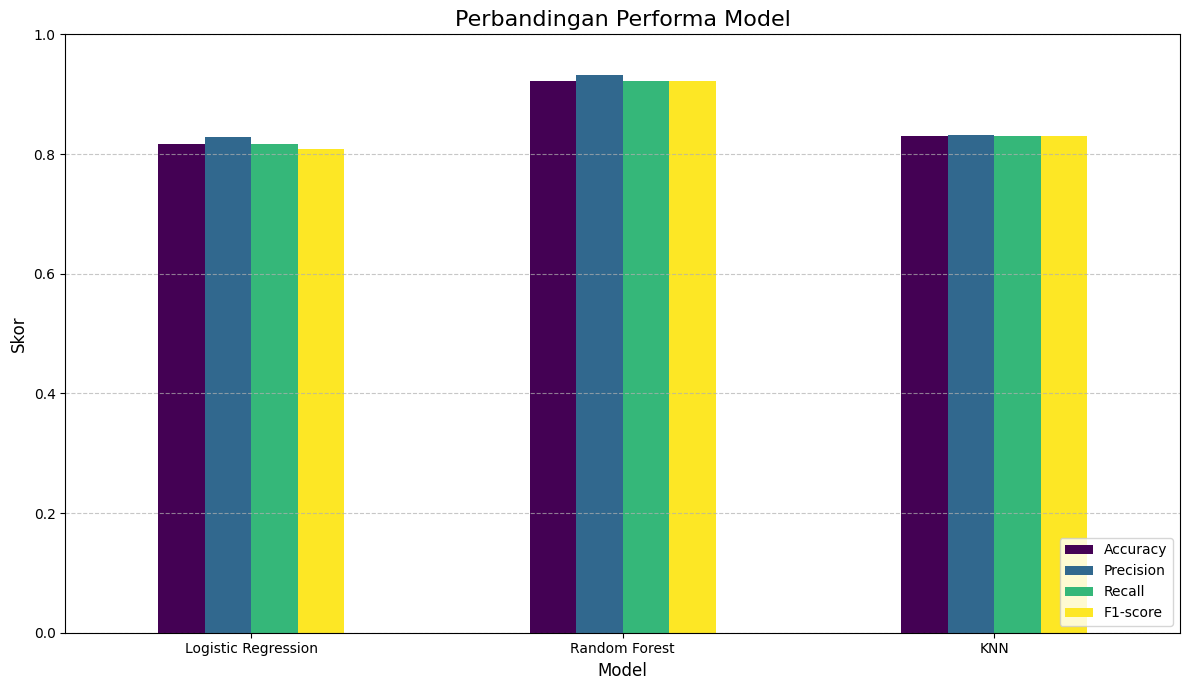

In [51]:
# Konversi hasil evaluasi menjadi DataFrame
results_df = pd.DataFrame(results).T  # Transpose agar model jadi baris

# Buat plot
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(12, 7), colormap='viridis')

plt.title('Perbandingan Performa Model', fontsize=16)
plt.ylabel('Skor', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##Kesimpulan Capstone 3


*   Random Forest menunjukkan performa terbaik dengan skor tertinggi pada Accuracy, Precision, Recall, dan F1-score (mendekati 90%).

*   KNN berada di peringkat kedua, dengan performa stabil dan cukup baik di semua metrik (sekitar 84%).

*   Logistic Regression memiliki performa terendah, meskipun masih layak dengan skor sekitar 82%.

*   Semua model memiliki perbedaan performa yang tidak terlalu signifikan, namun Random Forest unggul secara konsisten.

*   Random Forest direkomendasikan sebagai model terbaik untuk digunakan pada dataset ini.